In [42]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle

from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPooling2D, Dense

In [43]:
le = LabelEncoder()
images = []
labels = []

training_path = 'data/raw/character_set1/training_data/'
testing_path = 'data/raw/character_set1/testing_data/'


In [44]:
dir_list = os.listdir(training_path)
for i in dir_list:
  dir = os.path.join(training_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    images.append(img)
    labels.append(i)

## Print out details of X and y

In [45]:
X = np.array(images)
print("len(X): ",len(X))
print("X.shape: ", X.shape)

y = np.array(labels)
print("len(y): ",len(y))
print("y.shape: ", y.shape)

len(X):  20628
X.shape:  (20628, 64, 64, 3)
len(y):  20628
y.shape:  (20628,)


In [46]:
le = LabelEncoder()
y = le.fit_transform(y)
X_sh, y_sh = shuffle(X, y, random_state=42)

# Create Keras model
create a neural network model

In [47]:
model = Sequential()

In [48]:
model.add(Conv2D(filters=16, kernel_size=(3,3), activation='relu', input_shape=(64,64,3)))
model.add(MaxPooling2D())
model.add(Conv2D(filters=32, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=64, kernel_size=(3,3),  activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu'))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=36, activation='softmax'))

c:\Users\KISEKI\anaconda3\envs\tensor_flow\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [49]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

Epoch 1/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 14s 19ms/step - accuracy: 0.5859 - loss: 1.5348 - val_accuracy: 0.8951 - val_loss: 0.3813
Epoch 2/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9406 - loss: 0.2064 - val_accuracy: 0.9355 - val_loss: 0.2395
Epoch 3/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9521 - loss: 0.1388 - val_accuracy: 0.9360 - val_loss: 0.2011
Epoch 4/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 12s 18ms/step - accuracy: 0.9641 - loss: 0.0997 - val_accuracy: 0.9421 - val_loss: 0.1900
Epoch 5/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9695 - loss: 0.0802 - val_accuracy: 0.9392 - val_loss: 0.1921
Epoch 6/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 16ms/step - accuracy: 0.9709 - loss: 0.0740 - val_accuracy: 0.9450 - val_loss: 0.2109
Epoch 7/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9708 - loss: 0.0818 - val_accuracy: 0.9481 - val_loss: 0.1987
Epoch 8/10
661/661 ━━━━━━━━━━━━━━━━━━━━ 11s 17ms/step - accuracy: 0.9804 - loss: 0.0512 - 

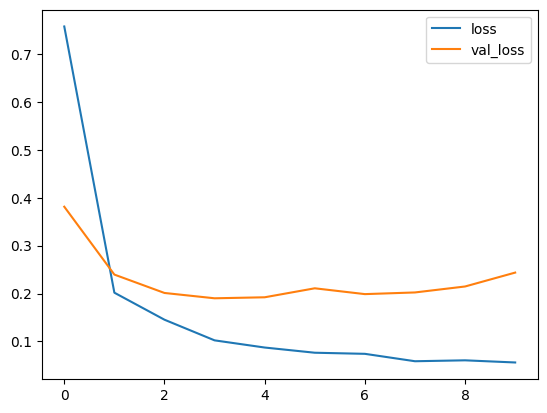

In [50]:
history = model.fit(X_sh, y_sh ,validation_split=0.2, batch_size=25, epochs=10)

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

In [51]:
test_images = []
test_labels = []

dir_list = os.listdir(testing_path)
for i in dir_list:
  dir = os.path.join(testing_path, i)
  file_list = os.listdir(dir)
  for j in file_list:
    files = os.path.join(dir, j)
    img = cv2.imread(files)
    img = cv2.resize(img, (64,64))
    img = np.array(img, dtype=np.float32)
    img = img/255
    test_images.append(img)
    test_labels.append(i)

In [52]:
X_test = np.array(test_images)
y_test = np.array(test_labels)
le = LabelEncoder()
y_test = le.fit_transform(y_test) 

In [53]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(test_loss,test_accuracy )

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9554 - loss: 0.1215
0.06209929287433624 0.971230149269104


## Visualization

### Visualize Regions

In [54]:
def visualize_regions(image, regions):
    debug_image = image.copy()
    for (x, y, w, h) in regions:
        cv2.rectangle(debug_image, (x, y), (x+w, y+h), (0, 255, 0), 2)
    cv2.imshow("Detected Text Regions", debug_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

### Visualize Processed Image

In [55]:
def display_processed_image(window_name, processed_image):
    cv2.imshow(window_name, processed_image)
    cv2.waitKey(0)
    cv2.destroyAllWindows()

## Image Processing Operations

In [84]:
def image_processing_operations_visualization(image, operation):
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    if operation == 'threshold':
        # Apply thresholding to get a binary image
        _, processed_image = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        window_name = "Thresholded Image"

    elif operation == 'erosion':
        # Apply thresholding and then erosion
        _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((2, 1), np.uint8)
        processed_image = cv2.erode(thresh, kernel, iterations=1)
        window_name = "Eroded Image"

    elif operation == 'dilation':
        # Apply thresholding and then dilation
        _, thresh = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)
        kernel = np.ones((1, 1), np.uint8)
        processed_image = cv2.dilate(thresh, kernel, iterations=1)
        window_name = "Dilated Image"

    else:
        raise ValueError("Operation must be 'threshold', 'erosion', or 'dilation'")

    # Display the processed image
    display_processed_image(window_name, processed_image)
    
    return _, processed_image

## Italic Characters Detection

### Compute Skew Angle

In [57]:
def compute_skew_angle(region):
    # Use moments to calculate the skew angle of a text region
    coords = np.column_stack(np.where(region > 0))
    rect = cv2.minAreaRect(coords)
    angle = rect[-1]
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = -angle
    return angle

### Deskew Angle

In [58]:
def deskew_region(region, angle):
    # Rotate the region by the computed angle
    (h, w) = region.shape[:2]
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(region, rotation_matrix, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_CONSTANT, borderValue=255)
    return rotated

## Detect Text Regions

In [ ]:
def detect_text_regions(image):
    # Apply image processing operation (e.g., thresholding, erosion, or dilation)
    _, processed_image = image_processing_operations_visualization(image, 'dilation')
    
    # Find contours (regions of characters)
    contours, _ = cv2.findContours(processed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    regions = []
    for contour in contours:
        x, y, w, h = cv2.boundingRect(contour)
        
        # region = processed_image[y:y+h, x:x+w]
        
        # Compute the skew angle of the detected region
        # angle = compute_skew_angle(region)
        
        # Deskew the region if the skew angle is significant
        # if abs(angle) > 5:  # Adjust the threshold based on your needs
        #     region = deskew_region(region, angle)
        
        # Update bounding box after deskewing (if any change occurred)
        # if abs(angle) > 5:
        #     x, y, w, h = cv2.boundingRect(region)'''
        
        # old
        # regions.append((x-1, y, w+1, h))
        
        # new
        if 0 < w < 100 and 0 < h < 100:  # Size filter
            regions.append((x, y, w, h))
    
    # Visualize the image regions
    visualize_regions(image, regions)
    
    return regions

## Sorting Bounding Boxes by Rows and Columns

In [60]:
def sort_bounding_boxes(regions):
    # Sort by `y` first (top-to-bottom) with a threshold to group by rows
    row_threshold = 20  # Adjust based on character spacing
    regions = sorted(regions, key=lambda box: box[1])

    # Group bounding boxes into rows
    rows = []
    current_row = [regions[0]]
    
    for i in range(1, len(regions)):
        if abs(regions[i][1] - current_row[-1][1]) < row_threshold:
            current_row.append(regions[i])
        else:
            rows.append(current_row)
            current_row = [regions[i]]
    rows.append(current_row)
    
    # Sort each row left-to-right
    sorted_regions = []
    for row in rows:
        sorted_row = sorted(row, key=lambda box: box[0])
        sorted_regions.extend(sorted_row)
    
    return sorted_regions


## Resize Image Operation

In [114]:
def resize_image(image, target_size=(64, 64), mode='normal'):
    if mode == 'normal':
        # Normal resize (ignores aspect ratio)
        resized_image = cv2.resize(image, target_size)
    elif mode == 'aspect_ratio':
        # Resize while maintaining aspect ratio
        (iH, iW) = image.shape[:2]
        if iW > iH:
            resized_image = cv2.resize(image, (target_size[0], int(target_size[0] * iH / iW)))
        else:
            resized_image = cv2.resize(image, (int(target_size[1] * iW / iH), target_size[1]))
        
        # After resizing, padding the image to make it exactly target_size
        (iH, iW) = resized_image.shape
        dX = int(max(0, target_size[0] - iW) / 2.0)
        dY = int(max(0, target_size[1] - iH) / 2.0)
        resized_image = cv2.copyMakeBorder(resized_image, dY, dY, dX, dX, cv2.BORDER_CONSTANT, value=[255, 255, 255])
    else:
        raise ValueError("Mode must be either 'normal' or 'aspect_ratio'")
    
    return resized_image

## Recognize Characters

In [ ]:
def recognize_characters(image, model, label_encoder):
    regions = detect_text_regions(image)
    
    sorted_regions = sort_bounding_boxes(regions)
    # print(sorted_regions)

    characters = []
    for (x, y, w, h) in sorted_regions:
        char_image = image[y:y+h, x:x+w]
        
        # Add padding
        pad = 1
        char_image = cv2.copyMakeBorder(char_image, pad, pad, pad, pad, cv2.BORDER_CONSTANT, value=[255, 255, 255])
        
        # Check if the char_image is empty
        if char_image.size == 0:
            print(f"Skipping empty character region at ({x}, {y}, {w}, {h})")
            continue  # Skip this iteration if the character image is empty
        
        # Print the shape of the character image for debugging
        print(f"Character image shape: {char_image.shape}")
        
        # Resize the character image
        char_image_resized = resize_image(char_image, target_size=(64, 64), mode='normal')
        char_image_normalized = char_image_resized / 255.0

        cv2.imshow('image after resized',char_image_normalized)
        cv2.waitKey(0)  # Wait indefinitely for a key press
        cv2.destroyAllWindows() 
        
        prediction = model.predict(np.expand_dims(char_image_normalized, axis=0))
        predicted_class = np.argmax(prediction, axis=1)
        predicted_char = label_encoder.inverse_transform(predicted_class)[0]
        
        #To be decided later #If the current character is 'i' or 'j' we will
        #pop the last element out (which is supposed to be the dot above small i and j)

        # ----- UNCOMMENT LATER -----
        # if predicted_char == 'i' or predicted_char == 'j'
        #     characters.pop()
        
        characters.append(predicted_char)

    return characters

# Driver Code

In [115]:
imggg = 'data/raw/character_set1/Test_3.jpg'
image = cv2.imread(imggg) 
y_pred = recognize_characters(image, model, le)
print(y_pred)
print(len(y_pred))

Character image shape: (23, 19, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Character image shape: (23, 17, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Character image shape: (23, 15, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Character image shape: (23, 15, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (23, 21, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Character image shape: (23, 21, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
Character image shape: (23, 22, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
Character image shape: (23, 19, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
Character image shape: (23, 18, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
Character image shape: (23, 17, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
Character image shape: (23, 19, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
Character image shape: (23, 16, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (23, 18, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
Character image shape: (23, 20, 3)
1/1 ━━━━━━━━━━━━